In [1]:
# Importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import os

In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
cd /kaggle/input/gtsrb-german-traffic-sign/Train


/kaggle/input/gtsrb-german-traffic-sign/Train


In [5]:
os.getcwd()

'/kaggle/input/gtsrb-german-traffic-sign/Train'

In [6]:
#load the dataset

def load_dataset(cur_path, classes):
    data = []
    labels = []
    classes = 43
    cur_path = os.getcwd()

    for i in range(classes):
        dir = cur_path + '/' + str(i)
        for j in os.listdir(dir):
            img_path = dir + '/' + j
            img = cv2.imread(img_path, -1)
            img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)
            data.append(img)
            labels.append(i)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels


data, labels = load_dataset(os.getcwd(), 43)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [7]:
#spilt the datset
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#Converting the labels into one hot encoding
import keras

y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)



In [9]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [10]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])
train_data.rename(columns={'ClassId': 'label', 'Path': 'path'}, inplace=True)

test_data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])
test_data.rename(columns={'ClassId': 'label', 'Path': 'path'}, inplace=True)

print(train_data.head())



   Width  Height  label                            path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png


In [11]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [12]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


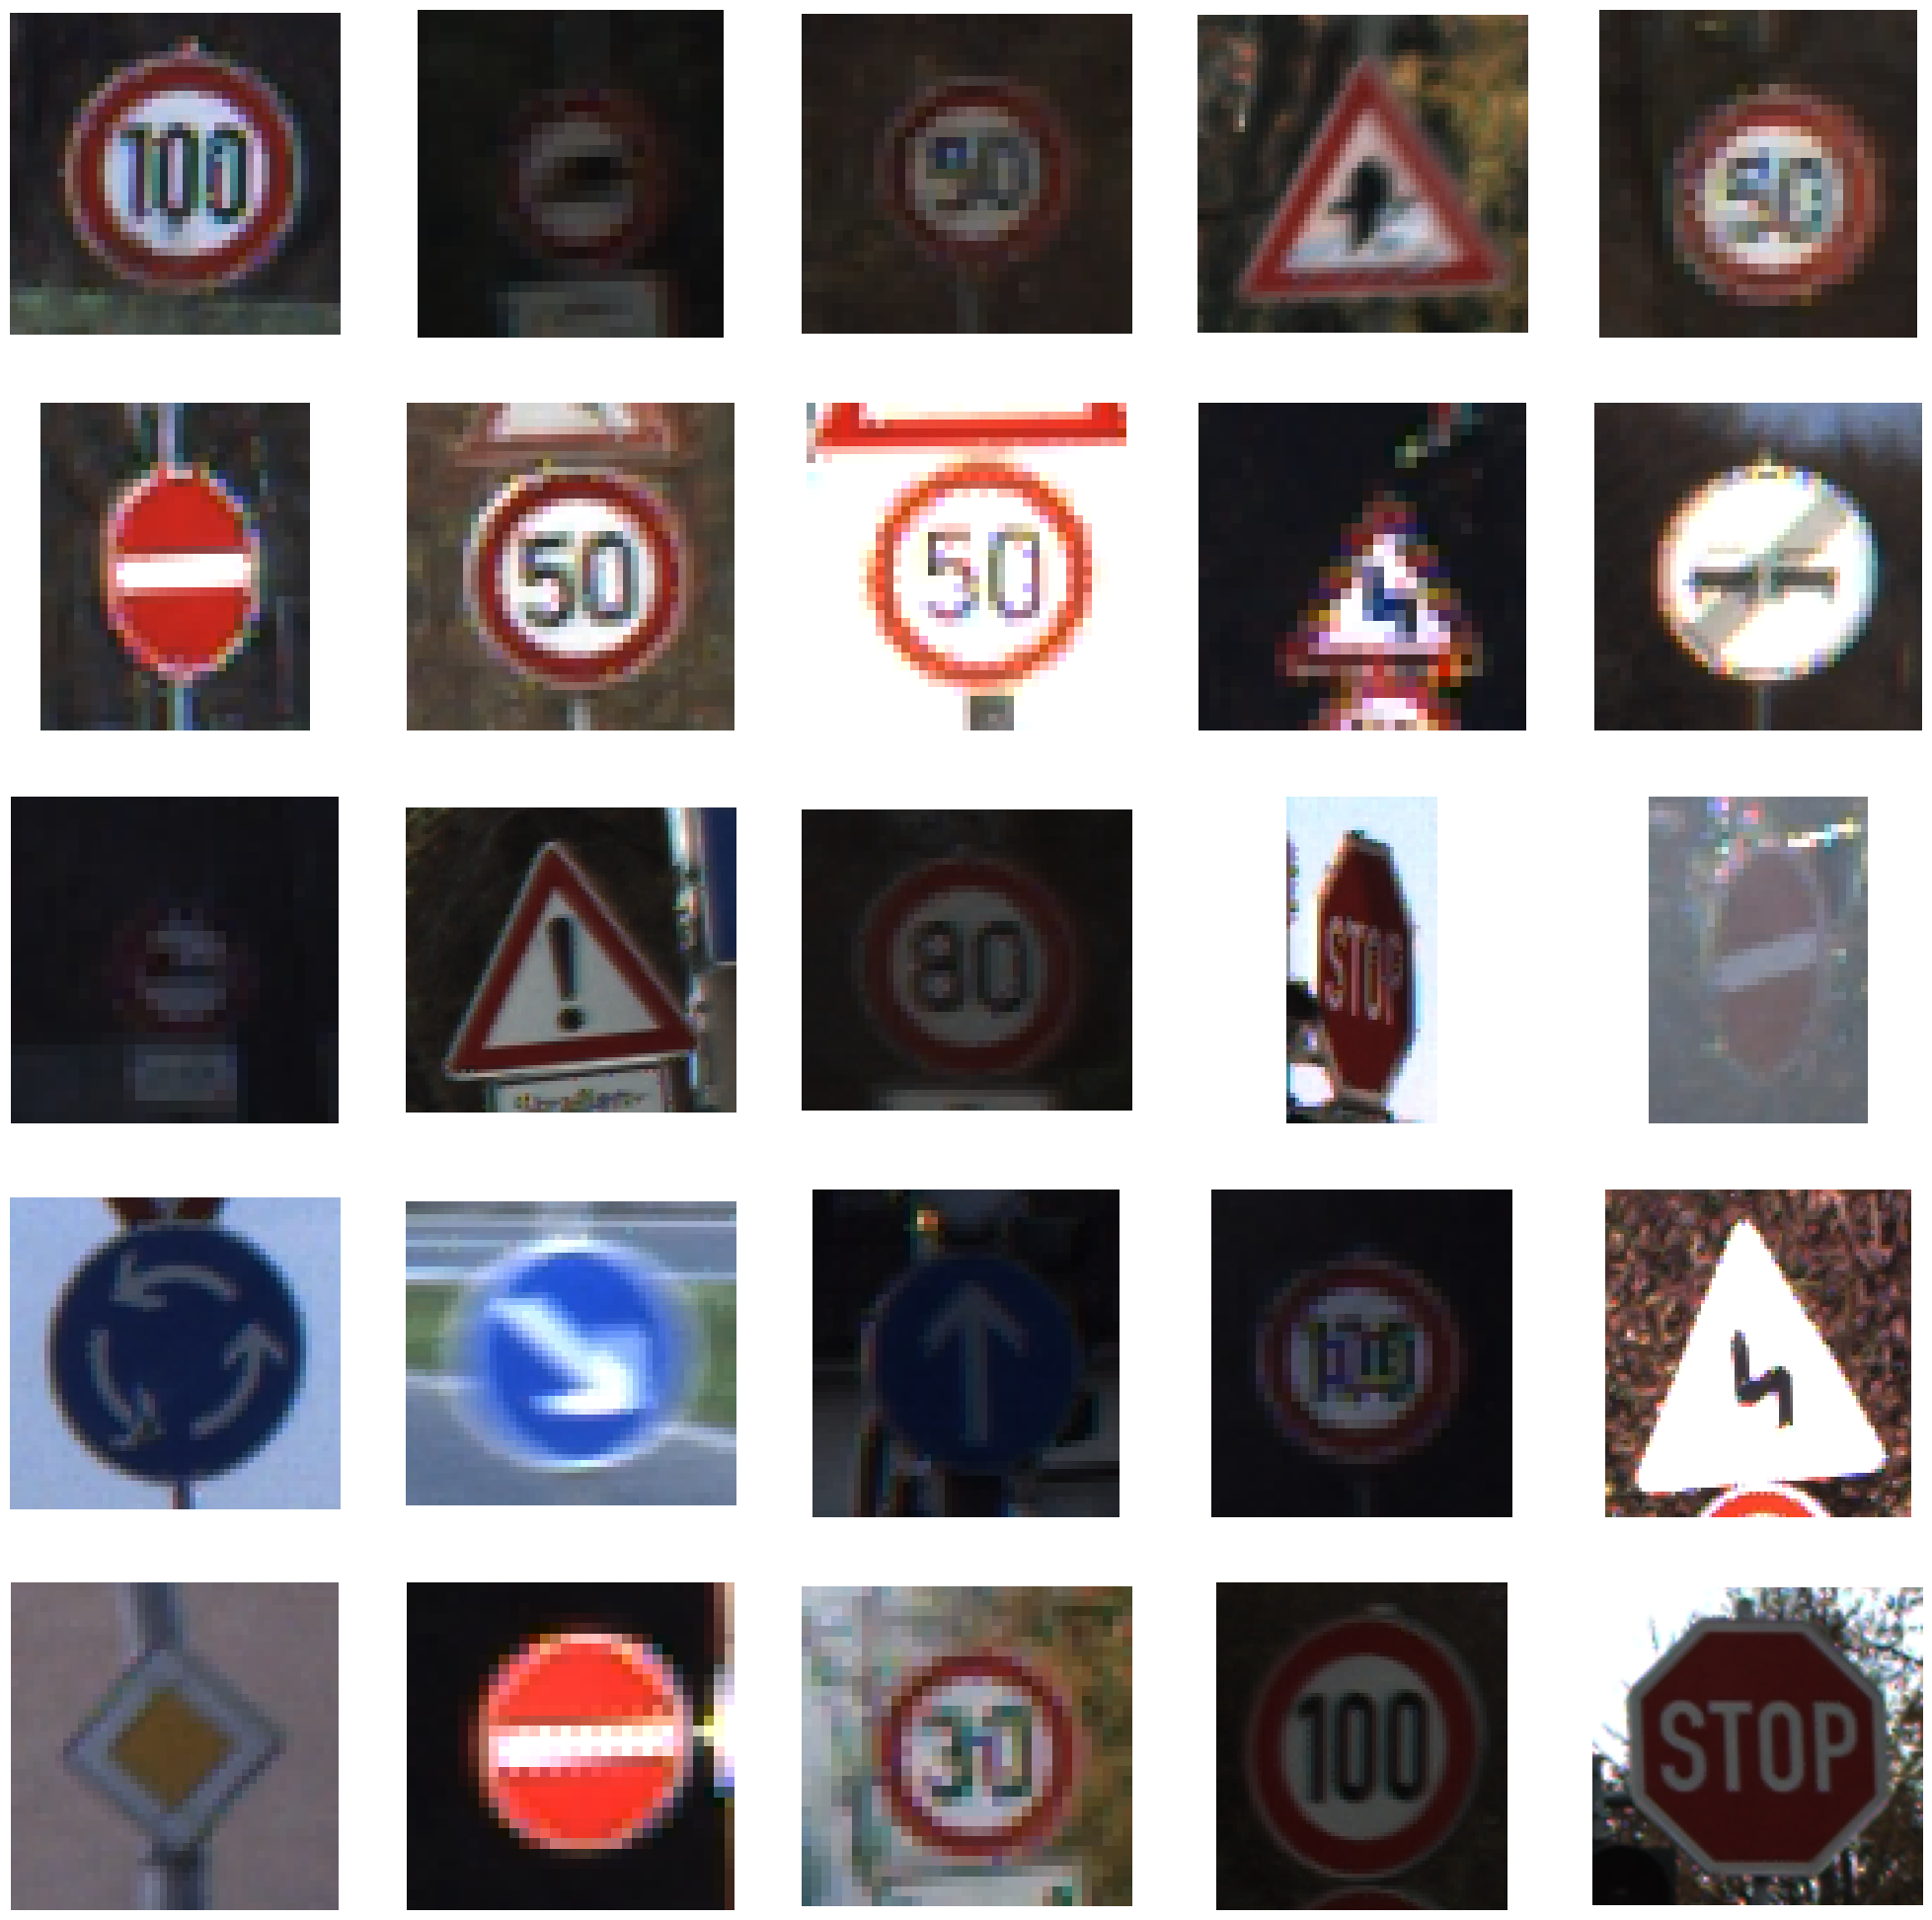

In [13]:
#Visulaize the testing data
import os
import random
from matplotlib.image import imread

data_dir = '/kaggle/input/gtsrb-german-traffic-sign/Test'
imgs = os.listdir(data_dir)

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path = data_dir + '/' + random.choice(imgs)
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(visible=False)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
plt.savefig('/kaggle/working/visualize_test_data.png')


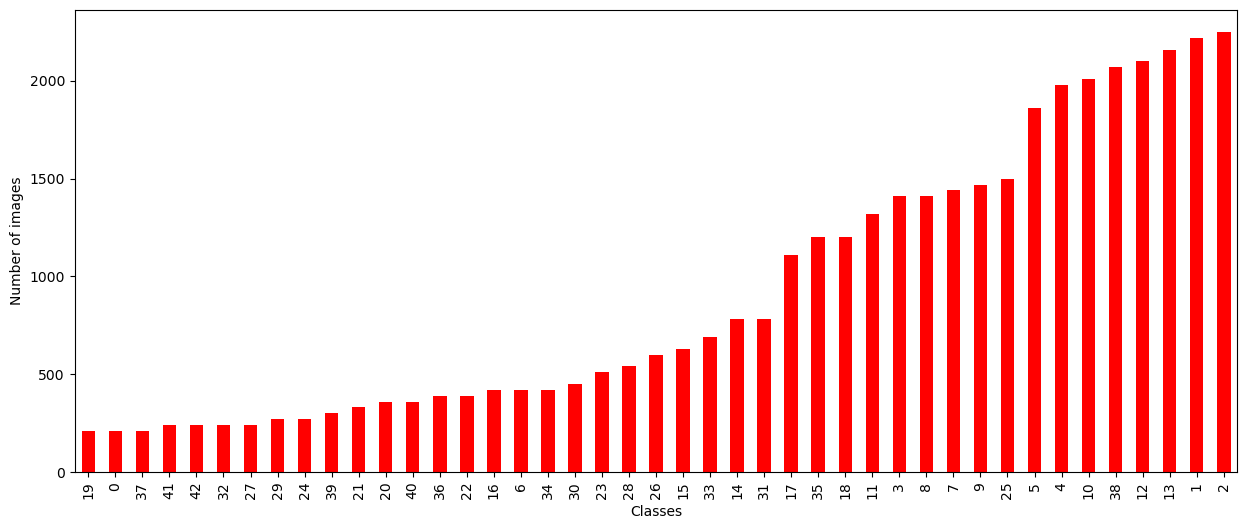

In [14]:
cur_path = os.getcwd()

data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df = pd.Series(data_dic)

plt.figure(figsize=(15, 6))
data_df.sort_values().plot(kind='bar', color='red')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.savefig('/kaggle/working/traffic_sign_class_distribution.png')
plt.show()


In [15]:
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [17]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [18]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Number of epochs for training
epochs = 20

# Training the model
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

# Saving the trained model
model.save("/kaggle/working/model_architecture.png")

Epoch 1/20
491/491 [==============================] - 27s 51ms/step - loss: 3.6301 - accuracy: 0.2626 - val_loss: 1.5218 - val_accuracy: 0.6403
Epoch 2/20
491/491 [==============================] - 24s 49ms/step - loss: 1.3773 - accuracy: 0.5936 - val_loss: 0.5493 - val_accuracy: 0.8588
Epoch 3/20
491/491 [==============================] - 25s 50ms/step - loss: 0.8832 - accuracy: 0.7309 - val_loss: 0.3555 - val_accuracy: 0.9119
Epoch 4/20
491/491 [==============================] - 24s 50ms/step - loss: 0.6750 - accuracy: 0.7933 - val_loss: 0.2458 - val_accuracy: 0.9359
Epoch 5/20
491/491 [==============================] - 25s 50ms/step - loss: 0.5527 - accuracy: 0.8304 - val_loss: 0.2079 - val_accuracy: 0.9410
Epoch 6/20
491/491 [==============================] - 24s 49ms/step - loss: 0.4992 - accuracy: 0.8500 - val_loss: 0.1610 - val_accuracy: 0.9560
Epoch 7/20
491/491 [==============================] - 24s 50ms/step - loss: 0.4600 - accuracy: 0.8620 - val_loss: 0.2069 - val_accuracy:

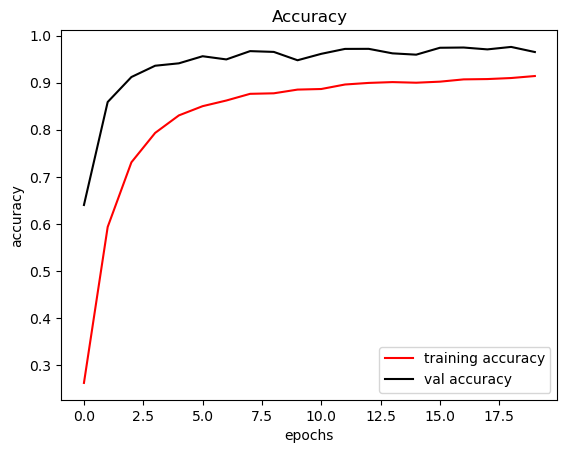

In [19]:
#plotting graphs for accuracy 

plt.plot(history.history['accuracy'], label='training accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val accuracy', color='black')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('/kaggle/working/accuracy.png')
plt.show()

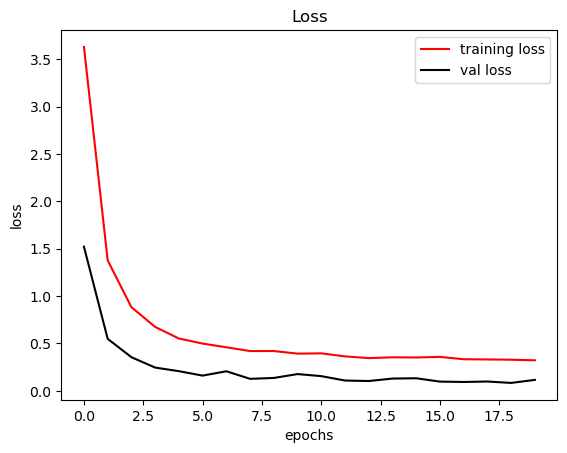

In [20]:
plt.plot(history.history['loss'], label='training loss', color='red')
plt.plot(history.history['val_loss'], label='val loss', color='black')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('/kaggle/working/loss.png')
plt.show()


In [21]:
#Evaluation of the Model
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.11596973240375519
Test accuracy 0.9649324417114258


In [22]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 2s 8ms/step


In [23]:

from sklearn.metrics import classification_report, confusion_matrix

print(f'Classification Report:\n{classification_report(y_test_class, y_pred_class)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_class, y_pred_class)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        42
           1       0.98      0.93      0.96       444
           2       0.93      0.90      0.91       450
           3       0.94      0.91      0.92       282
           4       0.97      0.96      0.96       396
           5       0.85      0.94      0.89       372
           6       0.99      1.00      0.99        84
           7       0.95      0.92      0.93       288
           8       0.93      0.96      0.94       282
           9       1.00      0.97      0.98       294
          10       0.99      0.99      0.99       402
          11       0.97      0.99      0.98       264
          12       0.99      1.00      1.00       420
          13       0.98      1.00      0.99       432
          14       1.00      1.00      1.00       156
          15       0.98      0.99      0.98       126
          16       1.00      1.00      1.00        84
    

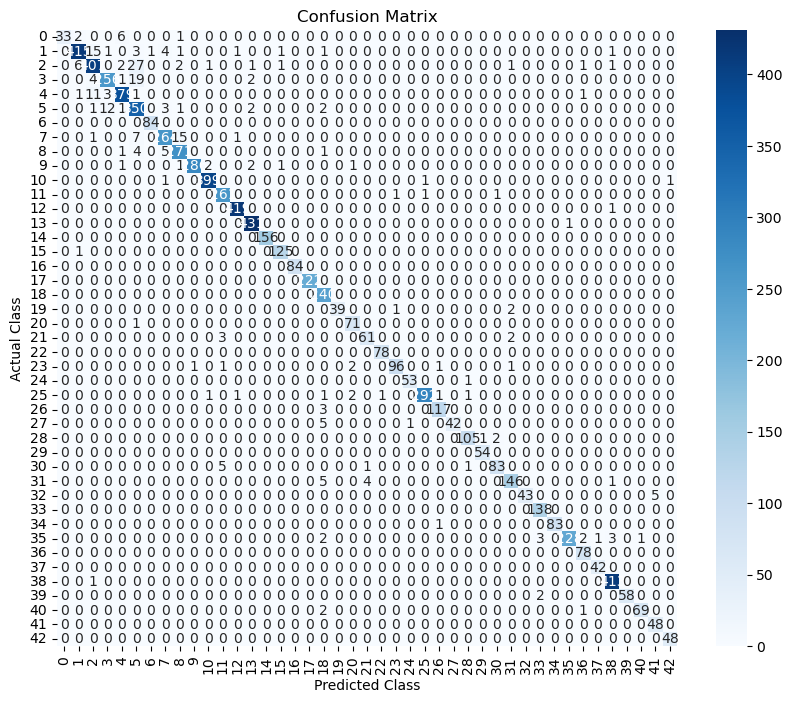

In [24]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Save the heatmap to a writable directory
plt.savefig('/kaggle/working/h1.png')



In [25]:

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred_class, y_test_class)
print(f'Accuracy: {score}')
print(f'Accuracy: {score * 100:.2f}%')

Accuracy: 0.964932415200204
Accuracy: 96.49%


In [26]:
model.save('/kaggle/working/traffic_classifier.h5')

In [27]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('/kaggle/working/traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }


# Initialize GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#a3469d')  

label = Label(top, background='#a3469d', font=('Arial', 15, 'bold'), fg='white')  
sign_image = Label(top)

def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred + 1]
    print(sign)
    label.configure(text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#2980B9', foreground='white', font=('Arial', 10, 'bold'))  
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 4.25), (top.winfo_height() / 4.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = Button(top, text="Upload an image", command=upload_image, padx=30, pady=10)
upload.configure(background='#2980B9', foreground='white', font=('Arial', 10, 'bold'))  
upload.pack(side=tk.BOTTOM, pady=50)
sign_image.pack(side=tk.BOTTOM, expand=True)
label.pack(side=tk.BOTTOM, expand=True)
heading = Label(top, text="Know Your Traffic Sign", pady=20, font=('Arial', 20, 'bold'), fg='white')  
heading.configure(background='#212F3D', foreground='#E74C3C') 
heading.pack()
top.mainloop()